### Imports

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import torch
from torchvision.utils import make_grid
from torchvision.transforms.functional import to_pil_image

In [2]:
root = 'C:\\Users\\appel\\Documents\\Project\\cubes\\'
os.chdir(root)

In [3]:
def convert_to_pil_image(batch):
    for cam in batch:
        row = make_grid(cam, nrow=cam.shape[0], padding=10, normalize=True, pad_value=1)
        combined_grid = torch.cat((combined_grid, row), dim=1) if 'combined_grid' in locals() else row
    return to_pil_image(combined_grid)

# Unity

In [4]:
from unity import UnityDataset, UnityDataModule

In [5]:
unitydataset = UnityDataset(epoch_length=100, port=8093)
unitydatamodule = UnityDataModule(unitydataset, batch_size=5, num_workers=0, shuffle=True)

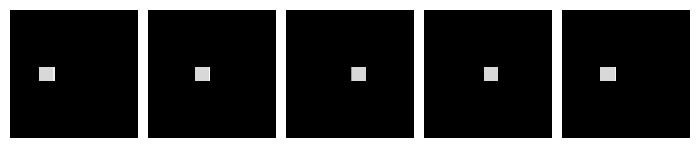

In [16]:
for batch in unitydatamodule.train_dataloader():
    # print(batch.shape)
    # print(batch)
    pil_image = convert_to_pil_image(batch['cameras'])
    break

pil_image

In [17]:
batch['cameras'][0].shape

torch.Size([5, 1, 128, 128])